<center>**Machine Learning 1 - Professor Dr. Yuxiao Huang** </center>
<center>**Christian Braz - Toufik Bouras** </center>
<center>Data Science, Columbian College of Arts & Sciences </center>
<center>George Washington University </center>

# Introduction 

In this article we discuss our work in the House Price prediction problem. This problem is a classic regression problem in which the aim is trying to predict the selling price of a house given its attributes. The motivation in executing such analysis is to provide to the real estate market accurate information about expected values of properties. 

We conduct an evaluation of eight regression algorithms comparing their accuracies.This work is organized in the following way: 

1. Methodology
1. Understanding and cleaning the data
1. Regression Models
 1. Linear Regression
     1. Ordinary Least Squares
     1. Ridge
     1. Lasso
     1. Elastic Net
 1. Suport Vector Machine
 1. Neural Network
 1. Random Forests 
 1. Deep Learning with TensorFlow 
1. Discussion


# Methodology


As we are dealing with a regression problem, an appropriated metric is the Root Mean Squared Error or RMSE. The methodology employed was:

* Each method trained using cross-validation with five-folds.
* Final RMSE is calculated based on the average results of all training steps.   

Using cross-validation is a common way to assess the predictive performance of the models and to judge how they perform outside the sample (and assess their generalization strengh). 


# Understanding and cleaning the data

As mentioned by several authors, much of the work in make a good model is related to a good feature engineering process. This phase encompasses tasks such as: cleaning, feature transformations, feature selection and feature scaling. In this section we describe the steps we did toward getting a better understanding about the data and make it more suitable for statistical analysis. 


## The data set

The house prices [data set](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) 
has 81 features and the objective is to predict SalePrice. Analyzing the dictionary that is available we 
could notice a potential problem - several categorical features has an 'NA' value to denote the absence of some characteristic and Python interprets NAs as a missing value. Next follows an example:
  
```
    Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

```


## Missing values

Maybe the most common problem in real datasets are missing values. Sometimes, instead of a blank in the position, a wildcard is used like '?' or 'NA'. In this work, besides the missing values we have also the problem described above, where 'NA' is being used to denote other kind of information. To solve this issue, all 'NA' value being used in categorical fields were replaced by the value 'No' which denotes the absence of some characteristic.



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

np.set_printoptions(threshold=np.nan) #to print all the elements of a matrix
#pd.set_option('display.max_rows', 2000)#to print all the elements of a data frame

%matplotlib inline
    
df = pd.read_csv("train.csv",na_values=['?',''],delimiter=',',delim_whitespace=False)
data_aux = df

In [2]:
print("Shape of training set: ", df.shape)
print("Missing values before remove NA: ")
print(data_aux.columns[data_aux.isnull().any()])

Shape of training set:  (1460, 81)
Missing values before remove NA: 
Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


Now, lets replace NA for No where appropriate and search for the missing values again.

In [3]:
#Alley
data_aux.Alley.fillna(inplace=True,value='No')
#BsmtQual
data_aux.BsmtQual.fillna(inplace=True,value='No')
#BsmtCond
data_aux.BsmtCond.fillna(inplace=True,value='No')
#BsmtExposure
data_aux.BsmtExposure.fillna(inplace=True,value='No')
#BsmtFinType1
data_aux.BsmtFinType1.fillna(inplace=True,value='No')
#BsmtFinType2
data_aux.BsmtFinType2.fillna(inplace=True,value='No')
#FireplaceQu
data_aux.FireplaceQu.fillna(inplace=True,value='No') 
#GarageType
data_aux.GarageType.fillna(inplace=True,value='No')
#GarageFinish
data_aux.GarageFinish.fillna(inplace=True,value='No')
#GarageQual 
data_aux.GarageQual.fillna(inplace=True,value='No')    
#GarageCond
data_aux.GarageCond.fillna(inplace=True,value='No')
#PoolQC
data_aux.PoolQC.fillna(inplace=True,value='No')    
#Fence
data_aux.Fence.fillna(inplace=True,value='No')
#MiscFeature
data_aux.MiscFeature.fillna(inplace=True,value='No')
    
print("Missing values after insert No, i.e., real missing values: ")
print(data_aux.columns[data_aux.isnull().any()])


Missing values after insert No, i.e., real missing values: 
Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'Electrical', 'GarageYrBlt'], dtype='object')


For treating missing values in numeric features we decided set zero in each missing value, hopefully minimizing any possible bias.

In [4]:
#Numeric fields    
data_aux.BsmtFinSF1.fillna(inplace=True,value=0)
data_aux.BsmtFinSF2.fillna(inplace=True,value=0)
data_aux.BsmtUnfSF.fillna(inplace=True,value=0)
data_aux.TotalBsmtSF.fillna(value=0,inplace=True)
data_aux.BsmtFullBath.fillna(inplace=True,value=0)
data_aux.BsmtHalfBath.fillna(inplace=True,value=0)
data_aux.GarageCars.fillna(value=0,inplace=True)
data_aux.GarageArea.fillna(value=0,inplace=True)
data_aux.LotFrontage.fillna(inplace=True,value=0)
data_aux.GarageYrBlt.fillna(inplace=True,value=0)
data_aux.MasVnrArea.fillna(inplace=True,value=0)
    

On the other hand, for missing categorical values we used an interpolation technique, inserting the mode of each column. 

In [5]:
#####Categorial fields
#KitchenQual
data_aux.KitchenQual = data_aux.KitchenQual.mode()[0]
#Functional
data_aux.Functional = data_aux.Functional.mode()[0]
#Utilities
data_aux.Utilities = data_aux.Utilities.mode()[0]  
#SaleType
data_aux.SaleType  = data_aux.SaleType.mode()[0]
#Exterior1st- nao posso remover linhas do teste
data_aux.Exterior1st = data_aux.Exterior1st.mode()[0]
#Exterior2nd
data_aux.Exterior2nd = data_aux.Exterior2nd.mode()[0]       
#Electrical - remove the records where the value is NA
data_aux.Electrical = df['Electrical'].mode()[0]
#MSZoning   - tem NA apenas na base de teste. Como nao posso remover linhas removo a coluna   
data_aux.MSZoning = data_aux.MSZoning.mode()[0]
#MasVnrType - remove the records where the value is NA 
data_aux.MasVnrType=df['MasVnrType'].mode()[0]
print("After tackled the missing problem, the status of the data set is: ")
print(data_aux.columns[data_aux.isnull().any()])



After tackled the missing problem, the status of the data set is: 
Index([], dtype='object')


We can see that there are no missing values remaining. 




## Encoding

Encoding is important to deal properly with different types of values: nominal, ordinal and numeric. In the house prices data set we could find all of them. As an example of ordinal feature:

```
ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
```

Thus, the next steps were the following:

* Map string ordinal fields to corresponding meaningful codes.
* Transform numeric nominal features to string.
* Apply one-hot encoding. 


In [6]:
#Mapping ordinal features

#LotShape: General shape of property
lotshape_map = {'Reg':'10','IR1':'8','IR2':'6','IR3':'2'}
data_aux.LotShape = data_aux.LotShape.map(lotshape_map)
data_aux.LotShape = data_aux.LotShape.astype('int64')

#Utilities: Type of utilities available       
utilities_map = {'AllPub':'10','NoSewr':'8','NoSeWa':'6','ELO':'2'}
data_aux.Utilities = data_aux.Utilities.map(utilities_map)
data_aux.Utilities = data_aux.Utilities.astype('int64')
    
#LandSlope: Slope of property
landslope_map = {'Gtl':'10','Mod':'8','Sev':'2'}
data_aux.LandSlope = data_aux.LandSlope.map(landslope_map)
data_aux.LandSlope = data_aux.LandSlope.astype('int64')

#ExterQual: Evaluates the quality of the material on the exterior 
quality_map = {'Ex':'10','Gd':'8','TA':'7','Fa':'5','Po':'2','No':'0'}
data_aux.ExterQual = data_aux.ExterQual.map(quality_map)
data_aux.ExterQual = data_aux.ExterQual.astype('int64')

#ExterCond: Evaluates the present condition of the material on the exterior
data_aux.ExterCond = data_aux.ExterCond.map(quality_map)
data_aux.ExterCond = data_aux.ExterCond.astype('int64')

#BsmtQual: Evaluates the height of the basement
data_aux.BsmtQual = data_aux.BsmtQual.map(quality_map)
data_aux.BsmtQual = data_aux.BsmtQual.astype('int64')

#BsmtCond: Evaluates the general condition of the basement
data_aux.BsmtCond = data_aux.BsmtCond.map(quality_map)
data_aux.BsmtCond = data_aux.BsmtCond.astype('int64')

#HeatingQC: Heating quality and condition
data_aux.HeatingQC = data_aux.HeatingQC.map(quality_map)
data_aux.HeatingQC = data_aux.HeatingQC.astype('int64')
        
#KitchenQual: Kitchen quality
data_aux.KitchenQual = data_aux.KitchenQual.map(quality_map)
data_aux.KitchenQual = data_aux.KitchenQual.astype('int64')

#FireplaceQu: Fireplace quality
data_aux.FireplaceQu = data_aux.FireplaceQu.map(quality_map)
data_aux.FireplaceQu = data_aux.FireplaceQu.astype('int64')

#GarageFinish: Interior finish of the garage
garage_map = {'Fin':'10', 'RFn':'8', 'Unf':'6', 'No':'0'}    
data_aux.GarageFinish = data_aux.GarageFinish.map(garage_map)
data_aux.GarageFinish = data_aux.GarageFinish.astype('int64')

#GarageQual: Garage quality
data_aux.GarageQual = data_aux.GarageQual.map(quality_map)
data_aux.GarageQual = data_aux.GarageQual.astype('int64')

#GarageCond: Garage condition
data_aux.GarageCond = data_aux.GarageCond.map(quality_map)
data_aux.GarageCond = data_aux.GarageCond.astype('int64')

#PoolQC: Pool quality
data_aux.PoolQC = data_aux.PoolQC.map(quality_map)
data_aux.PoolQC = data_aux.PoolQC.astype('int64')



In [7]:
#Converting numeric columns to nominal before applying one-hot encoding convertion
#After converting to String they will be treated as categorical

# MSSubClass as str
data_aux['MSSubClass'] = data_aux['MSSubClass'].astype("str")
# Year and Month to categorical
data_aux['YrSold'] = data_aux['YrSold'].astype("str")
data_aux['MoSold'] = data_aux['MoSold'].astype("str")    

In [8]:
#Converting from str to int for ordinal fields
data_aux.OverallCond = data_aux.OverallCond.astype("int64")
data_aux.OverallQual = data_aux.OverallQual.astype("int64")
data_aux['KitchenAbvGr'] = data_aux['KitchenAbvGr'].astype("int64")

In [9]:
#Finally, applying one-hot encoding

data_train = pd.get_dummies(data_aux)
print("New  shape after one-hot encoding:" , np.shape(data_train))




New  shape after one-hot encoding: (1460, 229)


## Data analysis

In this section we do some exploratory analysis on the numerical features of the data set. Is well known that linear regression methods are sensitive about non-linearity, outliers and colinearity.

### Checking linearity of the data

To begin with, we test to verify whether the data is linear. The strategy for this in a multiple linear regression problem is to plot the residuals against the predicted values. Figure 1 bellow shows the result. 

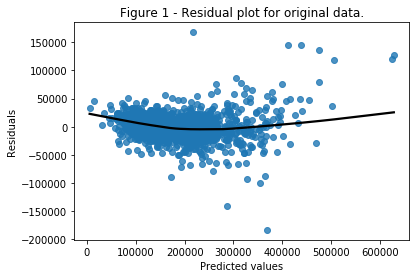

Mean square error:  525521621.741


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import statsmodels.api as sm

x_train = data_train.drop('SalePrice',axis=1)
y_train = data_train['SalePrice']

scaler = preprocessing.StandardScaler()
x_train_s = scaler.fit_transform(x_train)   

linear1 = LinearRegression()
linear1.fit(x_train_s, y_train)
pred = linear1.predict(x_train_s)
ax = sns.regplot(x=pred,y=y_train-pred,lowess=True,line_kws={"color":"black"})
ax.set_title('Figure 1 - Residual plot for original data.')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Residuals')
plt.show()

print("Mean square error: ",sum(np.power((y_train-pred),2))/x_train.shape[0])

#results = sm.OLS(y_train,x_train_s).fit()
#print(results.summary())

We can note some evidence of non-linearity and also o fairly high error. Hence, as recommended by the specilaized literature, we applied a non-linear transformation on the dependent variable SalesPrice. The new result is shown in Figure 2.


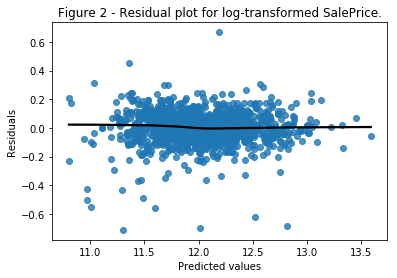

Mean square error:  0.0107809473016


In [11]:
linear2 = LinearRegression()
linear2.fit(x_train_s, np.log1p(y_train))
pred = linear2.predict(x_train_s)
ax = sns.regplot(x=pred,y=np.log1p(y_train)-pred,lowess=True,line_kws={"color":"black"})
ax.set_title('Figure 2 - Residual plot for log-transformed SalePrice.')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Residuals')
plt.show()
print("Mean square error: ",sum(np.power((np.log1p(y_train)-pred),2))/x_train.shape[0])


data_train['SalePrice'] = np.log1p(data_train.SalePrice)

As a result of applying a log transformation on the values of SalePrice, we get a much more linear residual plot and a impressive fall in the mean square error.


### Engineering new features

Analyzing the data we can observe that there is no single feature with the total size of the house. This information is spreaded in others variables, more specificaly in: TotalBsmtSF, 1stFlrSF, 2ndFlrSF and GarageArea. Hence, it seems to be a good idea to create a new feature (TotalSF) with this information. 

In [12]:
data_train['TotalSF'] = data_train['TotalBsmtSF'] + data_train['1stFlrSF'] + data_train['2ndFlrSF'] + data_train['GarageArea']

We now have a new data set with no missing values and a well defined set of features. As expected, after the one-hot encoding process we jumped from 81 to 230 features.

## Feature selection

Feature selection is the task of trying to discover the smallest set of features highly correlated to the dependent variable. It is important for the interpretability of the model but also to lead a better fit and consequentially a better performance as we are avoiding an unnecessarily complex model. We employed an automatic feature selection technique using a tree-based learning algorithm, and then used the tree structure produced to select the prevalent features. 

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor 
from sklearn.feature_selection import SelectFromModel
from tabulate import tabulate

#Tree-based feature selection
y_train = (data_train['SalePrice'])
x_train = (data_train.drop('SalePrice',axis=1))

#clf = ExtraTreesRegressor(random_state=0,n_estimators=1400)
clf = RandomForestRegressor(random_state=0,n_estimators=1400)
clf = clf.fit(x_train,y_train)

#Organinzing the features selected for visualization
pd.set_option('display.max_columns', None)#to print all the columns of a data frame
data = np.zeros((1,x_train.shape[1])) 
data = pd.DataFrame(data, columns=x_train.columns)
data.iloc[0] = clf.feature_importances_
data = data.T.sort_values(data.index[0], ascending=False).T
print("Ten most important features selected with tree-based selection: \n")
print(tabulate(data.iloc[:,0:5],headers='keys', tablefmt='psql'))
print(tabulate(data.iloc[:,6:11],headers='keys', tablefmt='psql'))

#Select the features based on the threshold
model = SelectFromModel(clf, prefit=True,threshold=1e-3)
#Reduce data to the selected features.
aux = model.transform(x_train)

print("\n New shape for train after tree-based feature selection: {}".format(aux.shape))
data_train_less_features_aux = pd.DataFrame(aux)
data_train_less_features_aux.columns = [data.columns[i] for i in range(0,aux.shape[1]) ]
print("\n Features selected :")
print(data_train_less_features_aux.columns)
data_train_less_features = pd.concat([data_train_less_features_aux,pd.DataFrame(y_train)],axis=1)

print("\n End of the process of selecting best features. \n")

Ten most important features selected with tree-based selection: 

+----+-----------+---------------+-------------+----------------+---------------+
|    |   TotalSF |   OverallQual |   YearBuilt |   YearRemodAdd |   OverallCond |
|----+-----------+---------------+-------------+----------------+---------------|
|  0 |  0.546845 |        0.2387 |   0.0196239 |      0.0187828 |     0.0127413 |
+----+-----------+---------------+-------------+----------------+---------------+
+----+-------------+-------------+--------------+------------+------------+
|    |   GrLivArea |   BsmtUnfSF |   BsmtFinSF1 |   1stFlrSF |   2ndFlrSF |
|----+-------------+-------------+--------------+------------+------------|
|  0 |   0.0107825 |  0.00850611 |   0.00808236 | 0.00692065 | 0.00636897 |
+----+-------------+-------------+--------------+------------+------------+

 New shape for train after tree-based feature selection: (1460, 41)

 Features selected :
Index(['TotalSF', 'OverallQual', 'YearBuilt', 'YearRe

The final process resulted in 41 features. It is important to note that the field we created before **TotalSF** was chosen as one of the most relevant feature. 

## Feature scaling

Our last step in the pre-processing phase would be standardize the data. This will be usefull for all the methods experimented. As we are using cross-validation, the scaling has to be done independently for each training and testing set being created. Hence, it will be executed when appropriate. 

# Regression Models

In this section we present a serie of evaluations of different algorithms packed in scikit-learn. The aim is to collect performance metric in order to compare the options. 


In [14]:
#Some usefull packages
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn   import metrics
from sklearn.model_selection import train_test_split


#Python dictionary to collect the results
RMSE_results = {
    
    'LinearRegression':0.0,
    'Lasso':0.0,
    'Ridge':0.0,
    'ElasticNet':0.0,
    'SVM':0.0,
    'NN':0.0,    
    'RF':0.0,
    'DeepNN':0.0
}



## Linear Regression

In this section we experiment a set of methods intended for regression in which the target value is expected to be a linear combination of the input variables. 

### Ordinary Least Squares

Least Squares is a well known mathematical solution for linear regression. It works trying to fit coefficients to minimize the residual sum of squares between the true values and the responses predicted by the linear approximation. It solves a problem of the form:   $\underset{w}{min\,} {|| X w - y||_2}^2$ 
and can be solved analyticaly by the equation

$$\hat\beta=(X^TX)^{-1}X^Ty$$

where X is a matrix of sample values, y is the actual response and $\hat\beta$ the estimated weights w. 

In [15]:
from sklearn.linear_model import LinearRegression, SGDRegressor, RidgeCV, Lasso, LassoCV, ElasticNetCV
from sklearn import preprocessing


x_train = data_train_less_features.drop('SalePrice',axis=1).values
y_train = data_train_less_features['SalePrice'].values



print("Linear Regression \n")

#Cross validation
classifierLinearRegression = LinearRegression()
kf = KFold(5, random_state=7, shuffle=True)    
cv_y = []
cv_pred = []
fold = 0
pred = []

for training, test in kf.split(x_train):
    fold+=1    
    pred = []    
    
    scaler = preprocessing.StandardScaler()
    x_train_fold = scaler.fit_transform(x_train[training,:])
    x_test_fold = scaler.transform(x_train[test])

    y_train_fold = y_train[training]    
    y_test_fold = y_train[test]
    
    classifierLinearRegression = classifierLinearRegression.fit(x_train_fold, y_train_fold)
    pred = classifierLinearRegression.predict(x_test_fold)
    cv_y.append(y_test_fold)
    cv_pred.append(pred)        

    
#Calculating the error.
cv_y = np.concatenate(cv_y)
cv_pred = np.concatenate(cv_pred)
score = np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("\n Average RMSE: {}".format(score))    
RMSE_results['LinearRegression'] = score

Linear Regression 


 Average RMSE: 0.15868285773519408


## Ridge

Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of coefficients. The new equation of a penalized residual sum of square is $\underset{w}{min\,} {{|| X w - y||_2}^2 + \alpha {||w||_2}^2}$.

Here, $\alpha \geq 0$ is called the regularization parameter (L2) and controls the amount of shrinkage. Higher the values of alpha, bigger is the penalty and therefore the magnitude of coefficients are reduced. It is worth note that we employed RidgeCV which does an implicit leave-one-out cross-validation to choose the best alpha. 

In [16]:
print("Ridge \n\n")

classifier = RidgeCV()

kf = KFold(5, random_state=7, shuffle=True)    
cv_y = []
cv_pred = []
fold = 0
pred = []

for training, test in kf.split(x_train):
    fold+=1
    pred = []
    
    scaler = preprocessing.StandardScaler()
    x_train_fold = scaler.fit_transform(x_train[training])
    x_test_fold = scaler.transform(x_train[test])

    y_train_fold = y_train[training]    
    y_test_fold = y_train[test]

    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    cv_y.append(y_test_fold)
    cv_pred.append(pred)        


cv_y = np.concatenate(cv_y)
cv_pred = np.concatenate(cv_pred)
score = np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("\n Average RMSE: {}".format(score))    
RMSE_results['Ridge'] = score

Ridge 



 Average RMSE: 0.15828549987190688


## Lasso

Mathematics behind lasso regression is quiet similar to that of ridge only difference being instead of adding squares of theta, we will add absolute value of w: $\underset{w}{min\,} { \frac{1}{2n_{samples}} ||X w - y||_2 ^ 2 + \alpha ||w||_1}$. Lasso is a linear model that estimates sparse coefficients, i.e., it reduces the number of variables upon which the given solution is dependent. It does a kind of feature selection and thus lead to a less complex final model. For instance, when there are correlated features it will choose one and set the coefficient of the other to zero. The regularization parameter alpha (L1) controls the degree of sparsity of the coefficients estimated and we employed once more the version of the algorithm that automatically chooses the best value.  


In [17]:
print("Lasso \n\n")

classifier = LassoCV()

kf = KFold(5, random_state=7, shuffle=True)    
cv_y = []
cv_pred = []
fold = 0
pred = []

for training, test in kf.split(x_train):
    fold+=1
    pred = []
    
    scaler = preprocessing.StandardScaler()
    x_train_fold = scaler.fit_transform(x_train[training])
    x_test_fold = scaler.transform(x_train[test])

    y_train_fold = y_train[training]    
    y_test_fold = y_train[test]
        
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    cv_y.append(y_test_fold)
    cv_pred.append(pred)        


cv_y = np.concatenate(cv_y)
cv_pred = np.concatenate(cv_pred)
score = np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("\n Average RMSE: {}".format(score))    
RMSE_results['Lasso'] = score

Lasso 



 Average RMSE: 0.15858019385700348


## Elastic Net

Is a hybrid method that trains with L1 and L2 as regularizers. This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. It is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while Elastic Net is likely to pick both. The objective function to minimize is in this case

$$\underset{w}{min\,} { \frac{1}{2n_{samples}} ||X w - y||_2 ^ 2 + \alpha \rho ||w||_1 + \frac{\alpha(1-\rho)}{2} ||w||_2 ^ 2}$$



In [18]:
print("Elastic Net \n\n")

classifier = ElasticNetCV()

kf = KFold(5, random_state=7, shuffle=True)    
cv_y = []
cv_pred = []
fold = 0
pred = []

for training, test in kf.split(x_train):
    fold+=1
    pred = []   
        
    scaler = preprocessing.StandardScaler()
    x_train_fold = scaler.fit_transform(x_train[training])
    x_test_fold = scaler.transform(x_train[test])

    y_train_fold = y_train[training]    
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    cv_y.append(y_test_fold)
    cv_pred.append(pred)        

cv_y = np.concatenate(cv_y)
cv_pred = np.concatenate(cv_pred)
score = np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("\n Average RMSE: {}".format(score))    
RMSE_results['ElasticNet'] = score

Elastic Net 



 Average RMSE: 0.15847870408022574


Lets compare the results so far. We can observe that all methods had fairly similar performance. Lasso and Elastic Net have slight lower RMSE mybe because both employs L1 regularization which seems to be a good choice for this problem. 

Text(0.5,0,'Models')

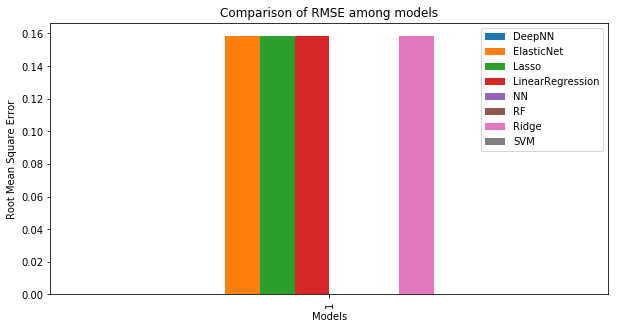

In [19]:
fig_1 = pd.DataFrame(RMSE_results, index=(1,) )
ax = fig_1.plot(kind='bar',figsize=(10,5), title="Comparison of RMSE among models")
ax.set_ylabel('Root Mean Square Error')
ax.set_xlabel('Models')

## Support Vector Machine

SVM is a large margin classifier. The rationale behind having decision boundaries with large margins is that they tend to have a lower generalization error whereas models with small margins are more
prone to overfitting. 

SVM did not work well in this problem. Fisrt, it broke due to the log transformation applied on SalePrice. Next we did the oposit transformation and applied exp function in SalePrice. Then we could execute the algorithm but with extremely poor results (different kernels and C values). Thus, we are not counting its result for comparison. 

In [20]:
from sklearn.svm import SVR
print("SVM")

classifierSVR = SVR(kernel='linear', C=1, gamma='auto') 

kf = KFold(5, random_state=7, shuffle=True)    
cv_y = []
cv_pred = []
fold = 0

for training, test in kf.split(x_train):
    fold+=1
    pred = []
        
    scaler = preprocessing.StandardScaler()
    x_train_fold = scaler.fit_transform(x_train[training])
    x_test_fold = scaler.transform(x_train[test])

    y_train_fold = (y_train[training])    
    y_test_fold = (y_train[test])
    
    classifierSVR = classifierSVR.fit(x_train_fold, y_train_fold)
    pred = classifierSVR.predict(x_test_fold)
    cv_y.append(y_test_fold)
    cv_pred.append(pred)        


cv_y = np.concatenate(cv_y)
cv_pred = np.concatenate(cv_pred)
score = np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("\n Average RMSE: {}".format(score))    

RMSE_results['SVM'] = score

SVM

 Average RMSE: 0.15328470868460783


## Multilayer Perceptron

In [21]:
from sklearn.neural_network import MLPRegressor

print("\nNeural Network")


classifier = MLPRegressor(alpha=1e-5,
                          #hidden_layer_sizes= (200,100, 80, 80, 50, 50, 80,80),
                          #hidden_layer_sizes=(80,50,50,20),
                          hidden_layer_sizes=(80,50,20),                          
                          random_state=1)
kf = KFold(5, random_state=7, shuffle=True)    
cv_y = []
cv_pred = []
fold = 0

for training, test in kf.split(x_train):
    fold+=1    
    pred = []
    
    scaler = preprocessing.StandardScaler()
    x_train_fold = scaler.fit_transform(x_train[training])
    x_test_fold = scaler.transform(x_train[test])

    y_train_fold = y_train[training]    
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    cv_y.append(y_test_fold)
    cv_pred.append(pred)        

   
cv_y = np.concatenate(cv_y)
cv_pred = np.concatenate(cv_pred)
score = np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("\n Average RMSE: {}".format(score))    

RMSE_results['NN'] = score


Neural Network

 Average RMSE: 0.7193660535434027


## Random Forest

Random Forests is one of the most versatile and precise classifier. It does not need the data being scaled and can deal with any number of features. In order to test the random forest algorithm a little further than the others, we decided to train it using different train sets. First, with a data set containing all the features and no scaling. Second, in the reduced train set with scaled eatures. 

As we can see in the results bellow, it did well in both cases. This test was also interesting to validate our set of selected features. Seems they are really good options once the performance using the the full set is not significatively better than using the restricted set.  

In [22]:
##Random Forests
from sklearn.ensemble import RandomForestRegressor

print("\n Random Forests ")
print("\n Full Features ")

y_train_rf = data_train['SalePrice'].values
x_train_rf = data_train.drop('SalePrice',axis=1).values

classifierAllFeatures = RandomForestRegressor(n_estimators=60,oob_score=True)

kf = KFold(5, random_state=7, shuffle=True)    
cv_y = []
cv_pred = []
fold = 0

for training, test in kf.split(x_train_rf):
    fold+=1
    pred = []
        
    x_train_fold = x_train_rf[training]
    y_train_fold = y_train_rf[training]
    x_test_fold = x_train_rf[test]
    y_test_fold = y_train_rf[test]
    
    classifierAllFeatures.fit(x_train_fold, y_train_fold)
    pred = classifierAllFeatures.predict(x_test_fold)
    cv_y.append(y_test_fold)
    cv_pred.append(pred)        


cv_y = np.concatenate(cv_y)
cv_pred = np.concatenate(cv_pred)
score = np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("\n Average RMSE using all features: {}".format(score))    


###########Less features
print("\n Less features ")

kf = KFold(n_splits=5, random_state=7 , shuffle=True)    
cv_y = []
cv_pred = []
fold = 0
pred = []

classifierRF_lessFeatures = RandomForestRegressor(n_estimators=60,oob_score=True)

for training, test in kf.split(x_train):
    fold+=1
    pred = []
    
    scaler = preprocessing.StandardScaler()
    x_train_fold = scaler.fit_transform(x_train[training])
    x_test_fold = scaler.transform(x_train[test])

    y_train_fold = y_train[training]    
    y_test_fold = y_train[test]
    
    classifierRF_lessFeatures.fit(x_train_fold, y_train_fold)
    pred = classifierRF_lessFeatures.predict(x_test_fold)
    cv_y.append(y_test_fold)
    cv_pred.append(pred)        
    
cv_y = np.concatenate(cv_y)
cv_pred = np.concatenate(cv_pred)
score = np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("\n Average RMSE less features: {}".format(score))    

RMSE_results['RF'] = score


 Random Forests 

 Full Features 

 Average RMSE using all features: 0.1456805553231723

 Less features 

 Average RMSE less features: 0.14598193282665844


## Deep Neural Network

In [23]:
import tensorflow as tf
import tensorflow.contrib.learn as learn
import shutil 
import os

print(" \n TensorFlow ")

sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

# Set the desired TensorFlow output level for this example
tf.logging.set_verbosity(tf.logging.ERROR)


feature_columns = [tf.contrib.layers.real_valued_column("", dimension=x_train.shape[1])]
classifierDNN = learn.DNNRegressor(
                                   hidden_units=[200,100, 80, 80, 50, 50, 80,80], 
                                   #hidden_units=[ 80, 80, 20], 
                                   feature_columns=feature_columns,                                   
                                  )


kf = KFold(5, random_state=7, shuffle=True)    
cv_y = []
cv_pred = []
fold = 0

for training, test in kf.split(x_train):
    fold+=1
    pred = []
    
     
    scaler = preprocessing.StandardScaler()
    x_train_fold = scaler.fit_transform(x_train[training])
    x_test_fold = scaler.transform(x_train[test])

    y_train_fold = y_train[training]    
    y_test_fold = y_train[test]
    
    # Early stopping
    validation_monitor = tf.contrib.learn.monitors.ValidationMonitor(
    x_test_fold,
    y_test_fold,
    every_n_steps=500,
    #metrics=validation_metrics,
    early_stopping_metric="loss",
    early_stopping_metric_minimize=True,
    early_stopping_rounds=400)
        
    classifierDNN.fit(x_train_fold, y_train_fold, monitors=[validation_monitor] ,steps=1000)
    pred = (list(classifierDNN.predict(x_test_fold, as_iterable=True)))
    
    cv_y.append(y_test_fold)
    cv_pred.append(pred)        


cv_y = np.concatenate(cv_y)
cv_pred = np.concatenate(cv_pred)
score = np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("\n Average RMSE: {}".format(score))    

RMSE_results['DeepNN'] = score

 
 TensorFlow 

 Average RMSE: 0.2016815992315465


Done! We have tested eight different classifiers in the house prices prediction problem. Lets now compare the performance of each one. 

Text(0.5,0,'Models')

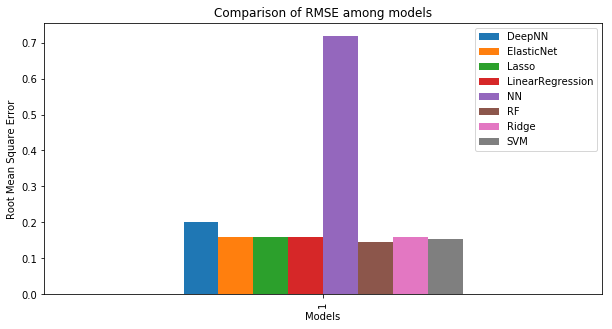

In [24]:
fig_1 = pd.DataFrame(RMSE_results, index=(1,) )
ax = fig_1.plot(kind='bar',figsize=(10,5), title="Comparison of RMSE among models")
ax.set_ylabel('Root Mean Square Error')
ax.set_xlabel('Models')


# Discussion